## Multiclass Classification: Kaggel Otto Dataset
https://www.kaggle.com/c/otto-group-product-classification-challenge

** Dataset Information: **

- Each row corresponds to a single product. There are a total of 93 numerical features, which represent counts of different events. All features have been obfuscated and will not be defined any further.


** Attribute Information: (93 features and 1 class)**

- id - an anonymous id unique to a product
- feat_1, feat_2, ..., feat_93 - the various features of a product
- target - the class of a product 

** Objective of this project **

- build a predictive model which is able to distinguish between our main product categories (class 1-9)

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

## Data

In [0]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline 
warnings.filterwarnings('ignore')

In [0]:
# Load Data
df = pd.read_csv('drive/app/train.csv',index_col='id')

In [19]:
# Inspect Data
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
4,1,0,0,1,6,1,5,0,0,1,...,0,1,2,0,0,0,0,0,0,Class_1
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [20]:
df.tail()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
id,,,,,,,,,,,,,,,,,,,,,
61874,1,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,2,0,Class_9
61875,4,0,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,Class_9
61876,0,0,0,0,0,0,0,3,1,0,...,0,3,1,0,0,0,0,0,0,Class_9
61877,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,10,0,Class_9
61878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,Class_9


In [21]:
df.shape

(61878, 94)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61878 entries, 1 to 61878
Data columns (total 94 columns):
feat_1     61878 non-null int64
feat_2     61878 non-null int64
feat_3     61878 non-null int64
feat_4     61878 non-null int64
feat_5     61878 non-null int64
feat_6     61878 non-null int64
feat_7     61878 non-null int64
feat_8     61878 non-null int64
feat_9     61878 non-null int64
feat_10    61878 non-null int64
feat_11    61878 non-null int64
feat_12    61878 non-null int64
feat_13    61878 non-null int64
feat_14    61878 non-null int64
feat_15    61878 non-null int64
feat_16    61878 non-null int64
feat_17    61878 non-null int64
feat_18    61878 non-null int64
feat_19    61878 non-null int64
feat_20    61878 non-null int64
feat_21    61878 non-null int64
feat_22    61878 non-null int64
feat_23    61878 non-null int64
feat_24    61878 non-null int64
feat_25    61878 non-null int64
feat_26    61878 non-null int64
feat_27    61878 non-null int64
feat_28    61878 non-null i

In [23]:
df.describe()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,0.263906,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,1.083340,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,30.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


In [24]:
df['target'].value_counts() #imbalanced target -->stratify

Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64

In [25]:
df.isnull().any().sum()

0

## Data preprocessing

** Split Features & Class (or target) **

In [26]:
X = df.drop('target', axis=1).values
y = df['target'].values
print(X.shape,y.shape)

(61878, 93) (61878,)


** Split Train Test Sets **

In [0]:
seed = 7 #random seed for reproducibility
np.random.seed(seed)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=seed,stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(49502, 93) (12376, 93) (49502,) (12376,)


In [29]:
np.unique(y_train,return_counts=True) #similar ratio to original class

(array(['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6',
        'Class_7', 'Class_8', 'Class_9'], dtype=object),
 array([ 1543, 12898,  6403,  2153,  2191, 11308,  2271,  6771,  3964]))

** Scale features **

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Baseline Model

In [0]:
# Import libraries
from sklearn.model_selection import StratifiedKFold,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier,BaggingClassifier,                              
                              AdaBoostClassifier,GradientBoostingClassifier)
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [0]:
# Define models
def baseline_models():
    models = []
    #linear
    models.append(('LR', LogisticRegression(n_jobs=-1)))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    #non-linear
    models.append(('KNN', KNeighborsClassifier(n_jobs=-1)))
    models.append(('NB', GaussianNB()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('SVM', SVC()))
    #ensemble
    models.append(('RF', RandomForestClassifier(n_estimators=100,random_state=seed,n_jobs=-1)))
    models.append(('Bag', BaggingClassifier(n_estimators=100,random_state=seed,n_jobs=-1)))
    models.append(('Ada', AdaBoostClassifier(n_estimators=100,random_state=seed)))
    models.append(('GB', GradientBoostingClassifier(random_state=seed)))
    models.append(('XGB', XGBClassifier(random_state=seed,n_jobs=-1)))
    return models

In [0]:
# cross validation
def cv_models(models=baseline_models(), X=X_train, y=y_train, n_splits=3, scoring='accuracy'):
    
    np.random.seed(seed)
    pd.options.display.float_format = '{:,.3f}'.format
    
    #cv
    names = []
    results = []
    kfold = StratifiedKFold(n_splits=n_splits, random_state=seed)
    for name,model in models:
        results.append(cross_val_score(model, X, y,cv=kfold, scoring=scoring)*100)                            
        names.append(name)
        
    #sort results by mean acc.
    cv_results = pd.DataFrame(data=results, index=names)
    cv_results['acc_mean(%)'] = cv_results.iloc[:,:n_splits].mean(axis=1)
    cv_results['acc_std(%)'] = cv_results.iloc[:,:n_splits].std(axis=1)
    cv_results.sort_values(by=['acc_mean(%)','acc_std(%)'],ascending=False, inplace=True)
    print(cv_results[['acc_mean(%)','acc_std(%)']])
    
    # visualize results
    plt.figure(figsize=(10,5))
    ax = sns.boxplot(data=cv_results.iloc[:,:n_splits].T)
    ax.set_xticklabels(cv_results.index)
    plt.title('Model Comparison')
    plt.ylabel('Accuracy(%)') 
    
    return cv_results

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


     acc_mean(%)  acc_std(%)
RF        79.831       0.339
Bag       78.910       0.393
GB        78.259       0.106
SVM       77.455       0.102
XGB       76.793       0.143
KNN       76.074       0.527
LR        75.387       0.159
DT        70.199       0.428
LDA       70.104       0.304
Ada       67.012       1.505
NB        61.175       0.399


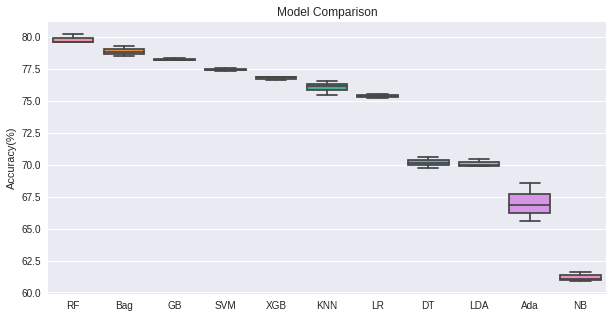

In [34]:
cv_results = cv_models(models=baseline_models(), X=X_train, y=y_train, 
                       n_splits=3, scoring='accuracy')

## Parameter Tuning
Top 3 algorithms: RF, Bag, GB

In [0]:
# define functions for grid search
scoring = 'accuracy'
kfold = StratifiedKFold(n_splits=3, random_state=seed)

def default_model_perfomance(model):
    cv = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)*100
    print(model.get_params())
    print('\nAccuracy of train set: {:0.1f} ({:0.1f})%'.format(cv.mean(), cv.std()))

def best_model_performance(model,param_grid):
    # grid search
    np.random.seed(seed)
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=kfold, verbose=1, scoring=scoring)
    grid_result = grid_search.fit(X_train,y_train)

    # results
    means = grid_result.cv_results_['mean_test_score']*100
    stds = grid_result.cv_results_['std_test_score']*100
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%.3f (%.3f)%% with: %r" % (mean, stdev, param))

    # best
    print("\nBest accuracy of train set: %.1f%% using %s" % (grid_result.best_score_*100, grid_result.best_params_))

#### Model 1: RandomForest

In [36]:
# Default
model = RandomForestClassifier(n_estimators=100,random_state=seed,n_jobs=-1)
default_model_perfomance(model)

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 7, 'verbose': 0, 'warm_start': False}

Accuracy of train set: 79.8 (0.3)%


In [37]:
# Grid Search
model = RandomForestClassifier(n_estimators=100,random_state=seed,n_jobs=-1)
n_estimators = [50,100,200]
param_grid = dict(n_estimators=n_estimators)
best_model_performance(model,param_grid)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.1min finished


79.536 (0.290)% with: {'n_estimators': 50}
79.831 (0.276)% with: {'n_estimators': 100}
80.173 (0.356)% with: {'n_estimators': 200}

Best accuracy of train set: 80.2% using {'n_estimators': 200}


In [0]:
# Feature Importance
model = RandomForestClassifier(n_estimators=200,random_state=seed,n_jobs=-1)
model.fit(X_train, y_train)
pd.DataFrame(data=model.feature_importances_,
             index=df.drop('target',axis=1).columns).plot(kind='bar',legend=False,
                                                        title='Feature Importances',
                                                         figsize=(30,10))

#### Model 2: Bagged Tree

In [40]:
# Default
model = BaggingClassifier(n_estimators=100,random_state=seed,n_jobs=-1)
default_model_perfomance(model)

{'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 7, 'verbose': 0, 'warm_start': False}

Accuracy of train set: 78.9 (0.3)%


In [43]:
# Grid Search
model = BaggingClassifier(random_state=seed,n_jobs=-1)
n_estimators = [10,50,100]
max_samples = [1.0, 0.9]
param_grid = dict(n_estimators=n_estimators, max_samples=max_samples)
best_model_performance(model,param_grid)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  8.2min finished


76.696 (0.331)% with: {'max_samples': 1.0, 'n_estimators': 10}
78.748 (0.198)% with: {'max_samples': 1.0, 'n_estimators': 50}
78.910 (0.321)% with: {'max_samples': 1.0, 'n_estimators': 100}
76.581 (0.209)% with: {'max_samples': 0.9, 'n_estimators': 10}
78.686 (0.183)% with: {'max_samples': 0.9, 'n_estimators': 50}
78.886 (0.245)% with: {'max_samples': 0.9, 'n_estimators': 100}

Best accuracy of train set: 78.9% using {'max_samples': 1.0, 'n_estimators': 100}


#### Model 3: Gradient Boosting

In [42]:
# Default
model = GradientBoostingClassifier(random_state=seed)
default_model_perfomance(model)

{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'presort': 'auto', 'random_state': 7, 'subsample': 1.0, 'verbose': 0, 'warm_start': False}

Accuracy of train set: 78.3 (0.1)%


In [44]:
# Grid Search
model = GradientBoostingClassifier(random_state=seed)
learning_rate = [0.01, 0.1]
n_estimators = [100, 200]
param_grid = dict(learning_rate=learning_rate,n_estimators=n_estimators)
best_model_performance(model,param_grid)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 31.6min finished


71.244 (0.253)% with: {'learning_rate': 0.01, 'n_estimators': 100}
73.722 (0.138)% with: {'learning_rate': 0.01, 'n_estimators': 200}
78.259 (0.087)% with: {'learning_rate': 0.1, 'n_estimators': 100}
79.274 (0.071)% with: {'learning_rate': 0.1, 'n_estimators': 200}

Best accuracy of train set: 79.3% using {'learning_rate': 0.1, 'n_estimators': 200}


## Final Model: RandomForest

** params: n_estimators=200 **

In [47]:
model = RandomForestClassifier(n_estimators=200,random_state=seed,n_jobs=-1)
model.fit(X_train, y_train)
accuracy = model.score(X_train, y_train)
print('Accuracy of train set: {:0.1f}%'.format(accuracy*100))

Accuracy of train set: 100.0%


** Save and load the final model **

In [0]:
#save model to disk
import pickle
filename='model.sav'
pickle.dump(model, open(filename, 'wb'))

In [49]:
#load the model from disk
model = pickle.load(open(filename,'rb'))
accuracy = model.score(X_train, y_train)
print('Accuracy of train set: {:0.1f}%'.format(accuracy*100))

Accuracy of train set: 100.0%


** Classification report & Confusion Matrix **

In [0]:
def model_evaluate(X=X_train, y_true=y_train):
    # make predictions
    y_pred =  model.predict(X)
    print('Accuracy:\t{:0.1f}%'.format(accuracy_score(y_true,y_pred)*100))

    #classification report
    print('\n')
    print(classification_report(y_true, y_pred))

    #confusion matrix
    confmat = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()

Accuracy:	100.0%


             precision    recall  f1-score   support

    Class_1       1.00      1.00      1.00      1543
    Class_2       1.00      1.00      1.00     12898
    Class_3       1.00      1.00      1.00      6403
    Class_4       1.00      1.00      1.00      2153
    Class_5       1.00      1.00      1.00      2191
    Class_6       1.00      1.00      1.00     11308
    Class_7       1.00      1.00      1.00      2271
    Class_8       1.00      1.00      1.00      6771
    Class_9       1.00      1.00      1.00      3964

avg / total       1.00      1.00      1.00     49502



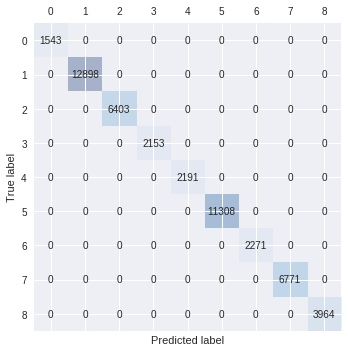

In [53]:
model_evaluate(X=X_train, y_true=y_train)

## Model Evaluation with Test set

Accuracy:	81.1%


             precision    recall  f1-score   support

    Class_1       0.85      0.44      0.58       386
    Class_2       0.71      0.90      0.79      3224
    Class_3       0.65      0.46      0.54      1601
    Class_4       0.85      0.44      0.58       538
    Class_5       0.97      0.96      0.97       548
    Class_6       0.92      0.94      0.93      2827
    Class_7       0.79      0.60      0.68       568
    Class_8       0.88      0.94      0.90      1693
    Class_9       0.86      0.90      0.88       991

avg / total       0.81      0.81      0.80     12376



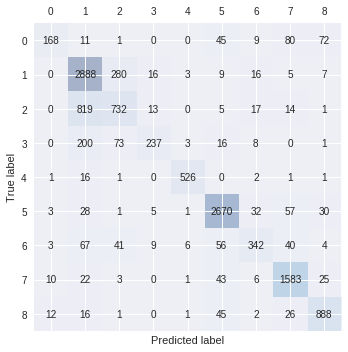

In [54]:
model_evaluate(X=X_test, y_true=y_test)

# Summary

- Best model: **RandomForest** w/ param: n_estimator=200

- Accuracy of test set: **81.1%**